In [17]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from time import time

%matplotlib inline

In [18]:
file = pd.ExcelFile('dataPoints.xlsx')
df = file.parse('Foglio1')
df.head()

X = df[['x1', 'x2']].to_numpy()
y_true = df[['y']].to_numpy().reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_true.reshape(-1,1), test_size=0.15, 
                                                    random_state=1869097)

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

In [19]:
def g_fun(T, sigma):
    num = np.exp(2*sigma*T) - 1
    den = np.exp(2*sigma*T) + 1
    return num / den

def fun_EL_MLP(X, v):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X, -1* np.ones((X.shape[0], 1)), axis=1)
    
    return np.dot(v, g_fun(np.dot(Wb, np.transpose(X1)), sigma))

def fun_grad_EL_MLP(v, X_train, y_true):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X_train, -1* np.ones((X_train.shape[0],1)), axis=1)

    # pick parameters from omega one
    v = v.reshape(N,1)
    omega = v.reshape(1,N)
        
    ### compute partial derivatives in a "pythonic" way:
    
    # for the sake of clearness, let's define some variables
    # (MATRIX1) dot product between Wb and X1
    T = np.dot(Wb, np.transpose(X1)) # NxX_train.shape[0] matrix
    
    # derivative of g()
    #g_der = 4 * sigma * np.exp(2 * sigma * T) / (np.exp(2 * sigma * T) + 1)**2

    dE_dv = 1 / X_train.shape[0] * np.dot(g_fun(T, sigma), np.transpose(fun_EL_MLP(X_train, omega) - y_true)) + 2 * rho * v

    return dE_dv.reshape(-1)

def loss(v, X, y_true):
    y_pred = fun_EL_MLP(X, v)
    l = np.sum((y_pred - y_true)**2)/(2 * X.shape[0]) + rho * np.linalg.norm(v)**2
    loss_history.append(l)
    return l

In [20]:
N = 30
n = np.shape(X)[1]
sigma = 1.8
rho = 0.00001

H = 10
min_list = []
loss_history = []

for h in range(H):

    W = np.random.randn(N,n)
    b = np.random.randn(N,1)
    v = np.random.randn(N)

    # merge W with b
    Wb = np.append(W, b, axis=1)

    res = minimize(loss, v, jac = fun_grad_EL_MLP, args=(X_train, y_train), method = "BFGS")#, options = {"maxiter": 100, "gtol":1e-2})
    min_list.append([res.fun, W, b])

In [21]:
min_list.sort(key = lambda x: x[0])
[x[0] for x in min_list]

[0.036329538017510654,
 0.03726736142949629,
 0.046516636664113466,
 0.05449510897781667,
 0.05688863211375405,
 0.05714901057132212,
 0.05776721459706165,
 0.05799541493761637,
 0.06379581016176067,
 0.07042703489902236]

In [22]:
W = min_list[0][1]#np.random.randn(N,n)
b = min_list[0][2]#np.random.randn(N,1)
v = np.random.randn(N)

loss_history = []
t1 = time()
res = minimize(loss, v, args=(X_train, y_train), method = "BFGS")#, options = {"maxiter": 100, "gtol":1e-2})
t1 = time()-t1
t1

1.9206910133361816

In [23]:
print(res.message)
print('fun:', res.fun)
print('success:',res.success)
print('nfev:', res.nfev)
print('nit:', res.nit)
print('njev:', res.njev)

Optimization terminated successfully.
fun: 0.05714846525301977
success: True
nfev: 7488
nit: 232
njev: 234


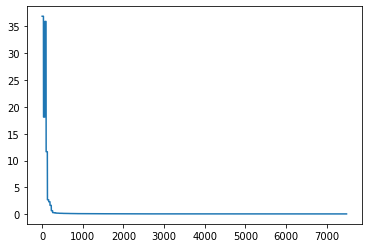

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [25]:
# losses
print(loss(res.x, X_train, y_train))
print(loss(res.x, X_test, y_test))

0.05714846525301977
0.06865568962041


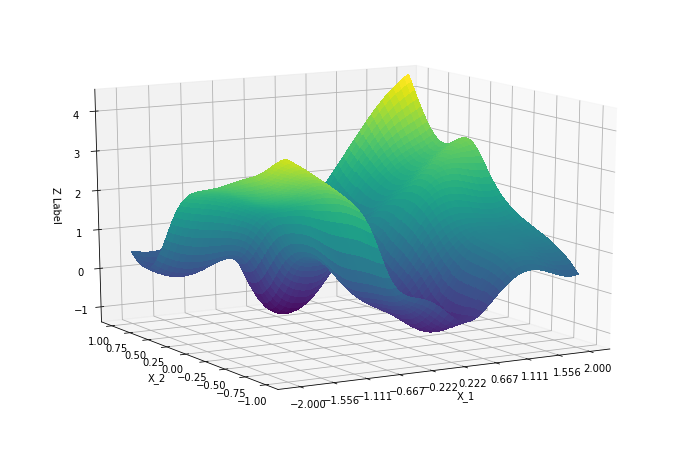

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

X_1 = np.linspace(-2,2,500)
X_2 = np.linspace(-1,1,500)
X_1, X_2 = np.meshgrid(X_1, X_2)
zs = np.array([fun_EL_MLP(np.array([x,y]).reshape(1,2), res.x) for x,y in zip(np.ravel(X_1), np.ravel(X_2))])
Z = zs.reshape(X_1.shape)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X_1, X_2, Z ,linewidth=0,cmap=cm.viridis, antialiased=False)
ax.set_xticks((np.linspace(-2,2,10)))
ax.view_init(elev=15, azim=240)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Z Label')
plt.savefig('graph_question_1_1.png',dpi=600)
plt.show()

# see if it's our function is convex: only 1 Neuron (v 1-dim)

In [27]:
X = df[['x1', 'x2']].to_numpy()
y_true = df[['y']].to_numpy().reshape(1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_true.reshape(-1,1), test_size=0.15, 
                                                    random_state=1869097)

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

N = 1
n = np.shape(X)[1]
sigma = 1.8
rho = 0.00001

W = np.random.randn(N,n)
b = np.random.randn(N,1)
v = np.random.randn(N)

# merge W with b
Wb = np.append(W, b, axis=1)

def g_fun(T, sigma):
    num = np.exp(2*sigma*T) - 1
    den = np.exp(2*sigma*T) + 1
    return num / den

def fun_EL_MLP(X, v):
    
    # creating matrix X1 (X matrix plus array of ones)
    X1 = np.append(X, -1* np.ones((X.shape[0], 1)), axis=1)
    
    return np.dot(v, g_fun(np.dot(Wb, np.transpose(X1)), sigma))

def loss(v, X, y_true):
    y_pred = fun_EL_MLP(X, v)
    l = np.sum((y_pred - y_true)**2)/(2 * X.shape[0]) + rho * np.linalg.norm(v)**2
    loss_history.append(l)
    return l

In [28]:
v_grid = np.linspace(-10, 10, 9000)

In [29]:
loss_grid = [loss(v, X, y_true) for v in v_grid] 

In [30]:
import matplotlib.pyplot as plt

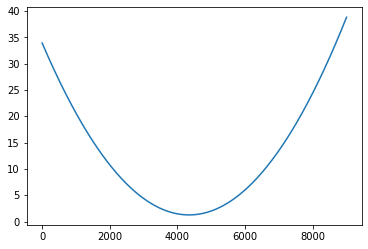

In [31]:
plt.plot(loss_grid)

In [32]:
min(loss_grid)

1.2702954828534727

In [33]:
loss_history = []
t1 = time()
res = minimize(loss, v, jac = fun_grad_EL_MLP, args=(X_train, y_train), method = "CG",
               options = {"maxiter": 10, "gtol":1e-3})
t1 = time()-t1
print(t1)

0.004670858383178711


In [34]:
res

     fun: 1.327920843969285
     jac: array([0.00032519])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 7
    njev: 8
  status: 0
 success: True
       x: array([-0.36902777])

In [35]:
print(res.fun, 'vs', min(loss_grid))

1.327920843969285 vs 1.2702954828534727


### 2.2 Consider again an RBF network as in Ex. 2 of Question 1.

Write a program which implements a method with unsupervised selection of the centers. You can select the centers by randomly picking N of the P points of the training set. We suggest to repeat the random choice more than once.

Find the optimal weights by minimizing the regularized error E(v) using a suitable Python routine or any other optimization library to minimize the quadratic convex function.


In [46]:
def fun_EL_RBF(X, v, c):
    
    #v = omega[0:N].reshape(N, 1)
    #c = omega[N: ].reshape(N, n)

    v = v.reshape(-1, 1)
    c_array = np.tile(c.reshape(-1), X.shape[0])
    X_array = np.tile(X, N).reshape(-1)

    mat = ((c_array-X_array).reshape(X.shape[0],N,2))**2

    col = mat[:,:,0] + mat[:,:,1]
    col = np.exp(-col/(sigma**2))


    return np.dot(col,v)


def fun_grad_EL_RBF(v, c, X, y_true):
    
    #v = omega[0:N].reshape(N, 1)
    #c = omega[N: ].reshape(N, n)

    v = v.reshape(-1,1)
    ### dE_dv
    c_array = np.tile(c.reshape(-1), X.shape[0])
    X_array = np.tile(X, N).reshape(-1)

    # ||X-c||**2 matrix 
    mat = ((c_array-X_array).reshape(X.shape[0],N,2))**2
    col = mat[:,:,0] + mat[:,:,1]
    
    # activation function
    col = np.exp(-col/(sigma**2))

    # dE_dv
    dE_dv = np.dot((fun_EL_RBF(X, v, c).T - y_true), col)/X.shape[0] + 2 * rho * v.T
    dE_dv = dE_dv.reshape(-1,1)
    
    ### dE_dc
    mat1 = (-(c_array-X_array)).reshape(X.shape[0],N,2)
    mat1 = mat1[:,:,0]
    mat1 = 2 * (col*v.T*mat1) / (sigma**2)
    mat1 = np.dot((fun_EL_RBF(X, v, c).T - y_true), mat1)/X.shape[0]

    mat2 = (-(c_array-X_array)).reshape(X.shape[0],N,2)
    mat2 = mat2[:,:,1]
    mat2 = 2 * (col*v.T*mat2) / (sigma**2)
    mat2 = np.dot((fun_EL_RBF(X, v, c).T - y_true), mat2)/X.shape[0]

    fusion = np.append(mat1.T, mat2.T, axis = 1)
    
    # dE_dc
    dE_dc = fusion + 2 * rho * c
    
    
    return dE_dv.reshape(-1)
    #return np.concatenate((dE_dv.reshape(1,-1), dE_dc.reshape(1,-1)), axis = 1).reshape(-1)


def loss_EL_RBF(v, c, X, y_true):

    y_pred = fun_EL_RBF(X, v, c).reshape(1,-1)
    l = np.sum((y_pred - y_true)**2)/(2 * X.shape[0]) + rho * np.linalg.norm(v)**2
    return l

In [70]:
N = 30
n = X.shape[1] 
v = np.random.randn(N, 1)
np.random.seed(1869097)


idx = np.random.choice(range(0,X_train.shape[0]), size = N)
c = X_train[idx]

sigma = 0.8
rho = 0.00001

t1 = time()
res = minimize(loss_EL_RBF, v, jac=fun_grad_EL_RBF, args=(c, X, y_true))
t1 = time()-t1
t1

print(res.message)
print('fun:', res.fun)
print('success:',res.success)
print('nfev:', res.nfev)
print('nit:', res.nit)
print('njev:', res.njev)

Optimization terminated successfully.
fun: 0.1006848307337223
success: True
nfev: 209
nit: 207
njev: 209


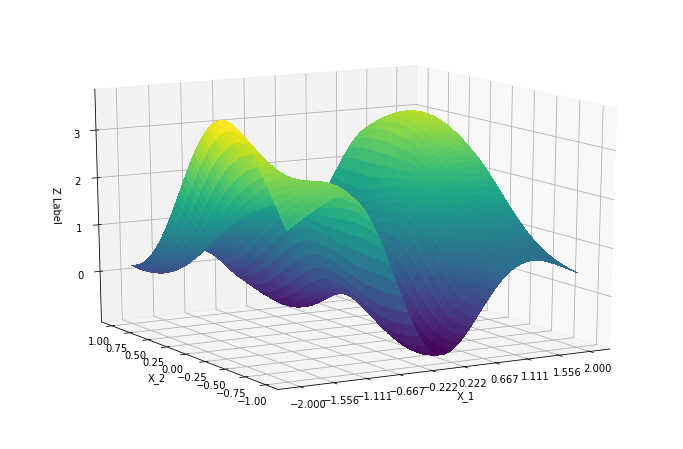

In [69]:
X_1 = np.linspace(-2,2,500)
X_2 = np.linspace(-1,1,500)
X_1, X_2 = np.meshgrid(X_1, X_2)
zs = np.array([fun_EL_RBF(np.array([x,y]).reshape(1,2), res.x, c) for x,y in zip(np.ravel(X_1), np.ravel(X_2))])
Z = zs.reshape(X_1.shape)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X_1, X_2, Z ,linewidth=0,cmap=cm.viridis, antialiased=False)
ax.set_xticks((np.linspace(-2,2,10)))
ax.view_init(elev=15, azim=240)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Z Label')
plt.savefig('graph_question_1_1.png',dpi=600)
plt.show()

In [62]:
# make the loop 
np.random.seed(1869097)

H = 10
min_list = []
loss_history = []
idx_history = []


for h in range(H):

    v = np.random.randn(N, 1)
    
    idx = np.random.choice(range(0,X_train.shape[0]), size = N)
    idx_history.append(idx)
    
    c = X_train[idx]

    res = minimize(loss_EL_RBF, v, jac=fun_grad_EL_RBF, args=(c, X, y_true))
    min_list.append([res.fun, W, b])
    

In [61]:
min_list.sort(key = lambda x: x[0])
min_list

[[0.09916462776406168,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.10823147222212595,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.11310028504812636,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.11326540414821307,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.11932903660909354,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.13366431609885854,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.13439054608328838,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.13493332728221194,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.14377914464349992,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])],
 [0.1594866518792545,
  array([[-0.73031058, -1.47868151]]),
  array([[0.69925302]])]]